#GRID SEARCH HYPERPARAMETER TUNING

###when dataset is small use it. (because of iterations)

#RANDOMSEARCHCV (number of iteration to define)

###Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.
###This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

#Cross-Validation and GridSearchCV
In GridSearchCV, along with Grid Search, cross-validation is also performed.

**Cross-Validation** is used while training the model. As we know that before training the model with data, we divide the data into two parts – train data and test data. In cross-validation, the process divides the train data further into two parts – the train data and the validation data.

The most popular type of Cross-validation is **K-fold Cross-Validation.** It is an iterative process that divides the train data into k partitions. Each iteration keeps one partition for testing and the remaining k-1 partitions for training the model. The next iteration will set the next partition as test data and the remaining k-1 as train data and so on. In each iteration, it will record the performance of the model and at the end give the average of all the performance. Thus, it is also a time-consuming process.

Thus, GridSearch along with cross-validation takes huge time cumulatively to evaluate the best hyperparameters. Now we will see how to use GridSearchCV in our Machine  Learning problem.

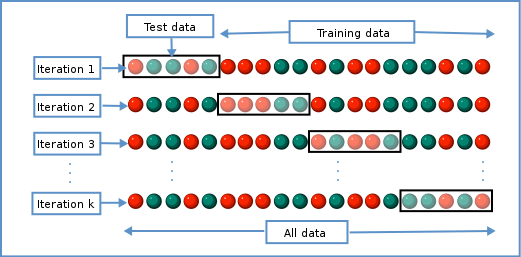

###How to Apply GridSearchCV?
.GridSearchCV() method is available in the scikit-learn class model_selection. It can be initiated by creating an object of GridSearchCV():

clf = GridSearchCv(estimator, param_grid, cv, scoring)

##Primarily, it takes 4 arguments i.e. estimator, param_grid, cv, and scoring. The description of the arguments is as follows:
estimator – A scikit-learn model

param_grid – A dictionary with parameter names as keys and lists of parameter values.

scoring – The performance measure. For example, ‘r2’ for regression models, ‘precision’ for classification models.

cv – An integer that is the number of folds for K-fold cross-validation.

In [1]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('heart.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [2]:
#Specifying Independent and Dependent Variables
X = df.drop('target', axis = 1)

y = df['target']

In [3]:
#Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [4]:
#Building Random Forest Classifier
rfc = RandomForestClassifier()

In [6]:
#Initializing GridSearchCV() object and fitting it with hyperparameters
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_train, y_train)


#Here, we passed the estimator object rfc, param_grid as forest_params, cv = 5 and scoring method as accuracy in to GridSearchCV() as arguments.

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [7]:
#Getting the Best Hyperparameters
print(clf.best_params_)

#This will give the combination of hyperparameters along with values that give the best performance of our estimate specified.

{'max_depth': 12, 'max_features': 9}


In [8]:
print(clf.best_score_)

0.984585289514867


In [9]:
#Best Params and Best Score of the Random Forest Classifier
print(clf.best_params_)
print(clf.best_score_)

#Thus, clf.best_params_ gives the best combination of tuned hyperparameters, and clf.best_score_ gives the average cross-validated score of our Random Forest Classifier.

{'max_depth': 12, 'max_features': 9}
0.984585289514867


##Q1. What is GridSearchCV used for?
A. GridSearchCV (Grid Search Cross-Validation) is a technique used in machine learning to search and find the optimal combination of hyperparameters for a given model. It systematically explores a predefined set of hyperparameter values, creating a “grid” of possible combinations. It then evaluates each combination using cross-validation and selects the one that produces the best performance. GridSearchCV helps in automating the process of hyperparameter tuning, enhancing model performance, and avoiding manual trial-and-error.

##Q2. Is GridSearchCV a library?
A. GridSearchCV is not a library itself, but rather a class provided by the popular Python machine learning library scikit-learn (sklearn). It is part of the sklearn library’s model_selection module. This class is used to perform grid search and cross-validation to find the best hyperparameters for a given machine learning model. By utilizing GridSearchCV, you can efficiently explore different hyperparameter combinations and optimize your model’s performance.

###Conclusions
Thus, in this article, we learned about Grid Search, K-fold Cross-Validation, GridSearchCV, and how to make good use of GridSearchCV. GridSearchCV is a model selection step and this should be done after Data Processing tasks. It is always good to compare the performances of Tuned and Untuned Models. This will cost us the time and expense but will surely give us the best results. The scikit-learn API is a great resource in case of any help. It’s always good to learn by doing.